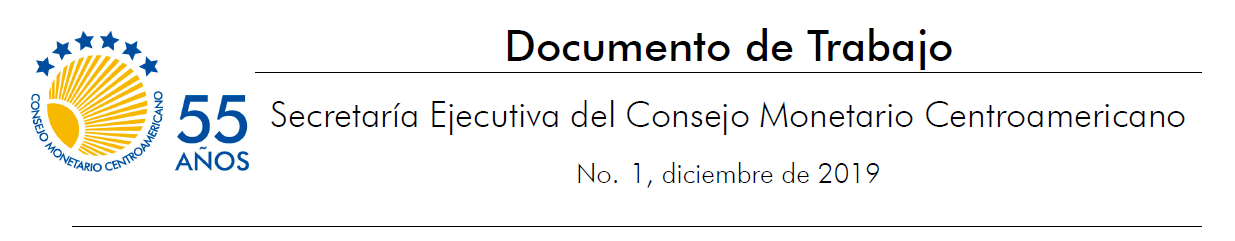

<center><h1>Entendiendo el blockchain</h1> 
    <b>Randall Romero-Aguilar</b> <br><a href="mailto:rromero@secmca.org">rromero@secmca.org</a>
</center>

<p><small>Economista Consultor de la Secretaría Ejecutiva del Consejo Monetario Centroamericano (SECMCA) y profesor de economía en la Universidad de Costa Rica (UCR). Doctor en Economía por la Ohio State University (OSU) y Master en Econometría por la London School of Economics (LSE). Las opiniones expresadas son las del autor y no necesariamente representan la posición de la SECMCA, ni de los miembros del CMCA.</small></p>

<center><b>Resumen</b></center>
    
Con la burbuja experimentada por Bitcoin en 2017 y su posterior desplome en 2018, se ha despertado mucho interés por su tecnología subyacente, el *blockchain*. Sus defensores afirman que es una tecnología revolucionaria, con aplicaciones que van mucho más allá de facilitar pagos. Para desmitificar este concepto y facilitar las discusiones acerca de este tema, en este documento de trabajo explicamos de manera sencilla, con la ayuda de un programa de Python, qué es y cómo funciona el blockchain.

**Palabras clave:** cadena de bloques, encriptación, dinero

**Clasificación JEL:** E42, O30, E40

Este cuaderno de Jupyter puede descargarse desde http://randall-romero.com/uploads/notas/Blockchain.zip.

Más allá de la muy discutible utilidad del Bitcoin como *dinero*, algunas de las características técnicas sobre las cuales está implementada esta criptomoneda han despertado gran interés, destacando entre ellas el *blockchain* o cadena de bloques y el *distributed ledger* o libro mayor distribuido.

El *distributed ledger* fue concebido como un mecanismo para *descentralizar* el registro de valor que usualmente desempeñan las instituciones financieras tradicionales, registro que resulta indispensable para la correcta operación de los sistemas de pagos. Por ejemplo, cuando Juan desea pagarle a María a través de una transferencia bancaria, es el banco el que en sus registros contables anota una disminución en el activo de Juan y un aumento en el de María. En parte gracias a esta función es que las instituciones financieras tienen una posición propicia para cobrar comisiones (que pueden verse ya sea como compensación justa por servicios ofrecidos o bien como rentas extraídas de sus clientes si se consideran abusivas) y para otorgar crédito (a partir de los depósitos de sus clientes).

Esta situación de registro centralizado de valor, el cual es particularmente vulnerable en caso de un ataque informático al nodo central de su respectiva red, por muchos años ha sido visto como *necesario*, puesto que resultaba difícil resolver el problema del “doble gasto” en una red descentralizada, lo que significa que una persona pudiese gastar más de una vez el mismo valor aprovechándose de la descoordinación o asincronismo entre los distintos registros de valor. En medio de la Gran Recesión de 2008, se publicó un artículo bajo el nombre de Satoshi Nakamoto \parencite{Nakamoto:2008} que describe una forma de resolver este problema, a través de lo que ha venido a conocerse como el *blockchain*. 

En esencia, un *blockchain* o cadena de bloques es un registro de transacciones, el cual está a su vez fragmentando en bloques secuenciales de información, los cuales están vinculados entre sí por medio de algoritmos cartográficos. Estas cadenas de bloques pueden ser compartidas entre muchos usuarios (*distributed ledger*), quienes posiblemente no se conozcan entre sí, a través de una red *peer-to-peer*. Cuando se produce una transacción, esta es registrada en el bloque más reciente de la cadena casi simultáneamente por numerosos nodos de esta red descentralizada, la cual resuelve el problema de doble gasto por medio del un mecanismo de consenso, que consiste en dar por válidas las transacciones que están incluidas en nodos que constituyen una mayoría.

Para comprender mejor el funcionamiento de una cadena de bloques, en este documento de trabajo presentamos una versión muy simple del código informático**1** necesario para llevar a cabo transacciones en la moneda ficticia Cocoin, cuyo símbolo presentamos en la figura 1. Para ello, utilizamos el lenguaje de programación Python**2**, el cual hoy en día es muy popular en muchas aplicaciones, especialmente en ciencia de datos, por su versatilidad y su sencillez. El lector que no esté familiarizado con Python o algún otro lenguaje de programación no debería tener mayor problema para comprender este código, puesto que está acompañado de explicaciones detalladas de cómo funciona. 

Figura 1: Símbolo del Cocoin
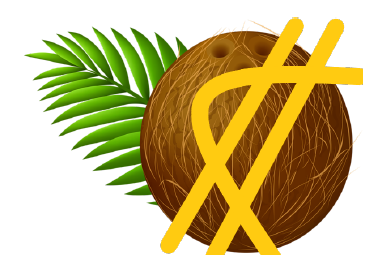

Además, en las explicaciones utilizamos la notación <span style="color:blue">blue</span>\linea{7} para indicar dónde en el código se está implemetando algo en particular (en este ejemplo concreto, en la línea 7).**3**

Antes de continuar, es importante recalcar que la intención de este documento de trabajo no es mostrar detalladamente el funcionamiento de Bitcoin ni de ninguna otra moneda virtual, sino la de explicar de la manera más sencilla posible qué es un *blockchain*. Para ello, hemos optado por dejar de lado algunas cuestiones técnicas necesarias para el funcionamiento de una red de pagos, como la autenticación de usuarios, el protocolo de comunicación, y la distribución de registros contables**4**.


El resto de este documento de trabajo está estructurado en seis secciones. El la primera explicamos cómo encriptar la información de un bloque, el cual desarrollamos en la sección 2. Teniendo ya una plantilla para crear bloques, en la sección 3 los encadenamos para crear un *blockchain*, con el que implementamos un sencillo sistema de pagos. En la sección 4 ponemos a prueba la cadena de Cocoin con una simulación, para ilustrar el funcionamiento de los pagos. En la sección5 implementamos un mecanismo para minar cocoins. Finalmente, ofrecemos unas reflexiones de fondo acerca de la tecnología *blockchain* en la sección 6.

# 1  Encriptando información
Para empezar la implementación de una cadena de bloques, importamos varios paquetes de Python que nos serán de utilidad:

In [1]:
from hashlib import sha3_256
from datetime import datetime
import numpy as np, pandas as pd
from random import randint, sample

La función `hashlib.sha3_256` la utilizaremos para encriptar información; `datetime` contiene la función `now` que usaremos para anotar la fecha y hora de las transacciones; `pandas` facilita herramientas para almacenar los datos; y `numpy` y `random` serán necesarios para hacer simulaciones más adelante.

El primer paso que debemos resolver es cómo encriptar la información. Para ello utilizaremos la función `sha3_256`, que es la función *hash* más reciente (publicada en 2015) de la familia SHA (*Secure Hash Algorithm*), la cual a su vez es publicada por el Instituto Nacional de Normas y Tecnología de Estados Unidos.

Una función *hash* es en esencia un algoritmo que toma un texto de cualquier tamaño y lo transforma en un número hexadecimal (es decir, en base 16, expresados con los dígitos 0-9 y las letras A-F) de un tamaño predeterminado, que cumple una serie de condiciones deseables, entre ellas 

1. bajo costo computacional,
2. compresión (toma un texto de mayor tamaño y lo reducen a una longitud pequeña),
3. determinista (para un texto dado, siempre se obtiene el mismo resultado),
4. difícil de invertir (a partir del resultado, es \emph{prácticamente} imposible saber el texto original, sin lo cual la función sería inútil para encriptar),
5. inyectividad (dos textos distintos dan por resultados dos resultados distintos).

Notemos que para que se cumpla esta última condición, es indispensable que el número de potenciales textos a encriptar sea menor que el número de resultados distintos que se puede obtener de la función *hash*.

El tamaño del resultado de una función *hash* depende del nivel de seguridad deseado. Así, por ejemplo, `sha3_256` da un resultado de 256 bits, con el cual se representa un número hexadecimal de 64 dígitos (cada número hexadecimal requiere 4 bits para almacenarse: $2^4=16$), aunque también existen las funciones `sha3_224` (para 56 dígitos), `sha3_384` (96 dígitos) y `sha3_512` (128 dígitos). Ahora bien, aunque a primera vista pueda parecer que 64 dígitos hexadecimales son muy pocos para encriptar todos los posibles textos que pueda necesitarse, una segunda vista nos hará notar que con ellos pueden encriptarse $16^{64}\approx 1.16\times 10^{77}$ textos distintos, ¡un número muy superior al producto del número de estrellas del universo *veces* el número de granos de arena en el planeta!

A continuación, en Python definimos la función `encriptar`, la cual en toma una `frase` y la guarda en formato Unicode (`.encode`), lo encripta con `sha3_256`, y lo representa en hexadecimal (`.hexdigest`). Para facilidad de lectura, este número lo excribimos en mayúscula (`.upper`)  y lo partimos en secuencias de cuatro dígitos (similar a como aparecen los números de tarjetas de crédito en los plásticos respectivos).

In [2]:
def encriptar(frase):
    encriptado = sha3_256(frase.encode('utf-8')).hexdigest().upper()
    return ' '.join([encriptado[i:i + 4] for i in range(0, 64, 4)])

Para probar esta función, encriptemos el texto `"Consejo Monetario Centroamericano"`, lo cual da por resultado este código de 64 dígitos:

In [3]:
encriptar('Consejo Monetario Centroamericano')

'B24F 92C2 99C6 D3D3 B19B B2A2 859D FE09 F6A8 58C0 5162 C708 A52B 695D 4203 312C'

Para ilustrar las propiedades de la función *hash*, veamos cómo cambia ese código ante pequeños cambios en el texto. Primero, separamos la palabra "Centroamericano"

In [4]:
encriptar('Consejo Monetario Centro Americano')

'7455 A87C 7C07 DE68 B4FD 8958 065D 5560 676B 4278 8B4F 5952 C149 D906 9B82 DE86'

luego, omitimos una letra en "Consejo"

In [5]:
encriptar('Conejo Monetario Centroamericano')

'63EF 5EA4 920D 5BED E7BF 0C9C C8AC EE17 7A42 ACC1 E4AC 7717 EEA3 BE77 C355 8722'

o bien cambiamos una letra en "Consejo"

In [6]:
encriptar('Concejo Monetario Centroamericano')

'5484 3890 0274 05A6 4572 AC5E 2023 65D3 6E97 B063 52BA E7CB C09A 4D3C 3ECE 7E85'

finalmente, cambiamos de orden dos letras en "Centroamericano"

In [7]:
encriptar('Consejo Monetario Centraomericano')

'D9BB CB6D 1C09 6055 C737 1009 BF96 C961 0898 E54C 7C74 64F6 E064 B885 B917 3523'

Como puede verse, pequeños cambios en el texto dan por resultado códigos completamente distintos, por lo que conocer los códigos de algunos textos en particular es inútil para adivinar el mensaje encriptado en otro código.

# 2  Creando un bloque

De la misma manera que no podemos hacer un tren sin vagones, para hacer una cadena de bloques primero debemos construir los bloques individuales. Cada bloque contiene datos, y la cadena de bloques es al fin de cuentas una secuencia **ordenada** de bloques de información, atados entres sí por medio de claves criptográficas.

Vamos a programar en Python una *clase* llamada `Bloque`, que en términos de programación significa que vamos a desarrollar un *prototipo* de “bloque”, en el cual describimos qué datos contendrá un bloque y qué acciones podrá hacer el bloque con ellos. Más adelante crearemos los bloques individuales (objetos) de la cadena a partir de este prototipo.

In [8]:
class Bloque:
    def __init__(self, índice, saldos, código_previo):
        self.índice = índice
        self.saldos = saldos
        self.código_previo = código_previo
        self.código = None
        self.transacciones = pd.DataFrame(columns=['Fecha', 'De', 'Para', 'Cantidad'])
        self.fecha_hora = datetime.now()

    def encriptar_bloque(self):
        datos = ['índice', 'saldos', 'código_previo', 'transacciones', 'fecha_hora']
        contenido = ''.join(str(getattr(self,campo)) for campo in datos)
        self.código = encriptar(contenido)
            
    def actualizar_transacciones(self, de, para, cantidad):
        T = self.transacciones.shape[0]
        self.transacciones.loc[T] = [datetime.now(), de, para, cantidad]

Intuitivamente, imaginamos la clase `Bloque` como una caja en la cual depositamos información. Esto se ilustra en la figura 2, donde los datos contenidos en el bloque se muestran en cuadros rosados, y los métodos o acciones se muestran en cuadros celestes en la parte baja del bloque. 

Figura 2: Clase Bloque
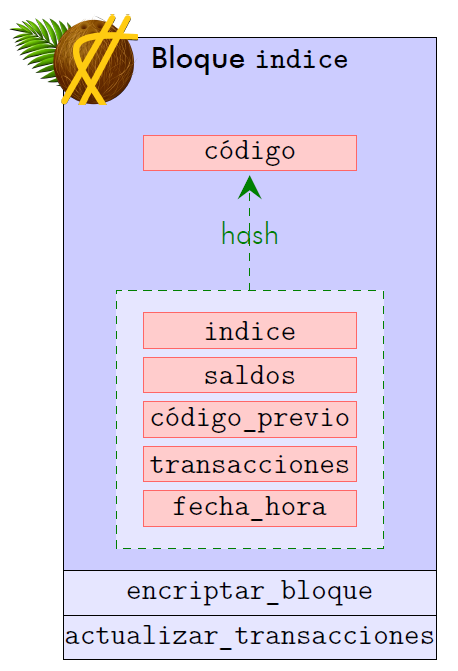

A continuación explicamos el contenido y funcionamiento de esta clase. El método `__init__` se utiliza para indicarle a Python cómo debe crear o “iniciar” un nuevo objeto. En este caso, le indicamos que para crear un `Bloque` nuevo se requiere de tres datos, a saber `índice, saldos, código_previo`, los cuales simplemente son almacenados en el bloque. Estos tres datos corresponden a:

* **`índice`** un número entero que indica la posición del bloque en la cadena,
* **`saldos`** una serie de `pandas` que registrará las tenencias de Cocoins de cada usuario,
* **`código_previo`** el código criptográfico del bloque anterior en la cadena, que servirá para enlazar los bloques y para determinar si la cadena es modificada “ilegalmente” en algún momento (más detalles en la próxima sección).


Aparte de estos tres datos, esta clase indica que cada bloque tendrá como datos adicionales:

* **`código`** el código criptográfico del bloque (inicialmente ninguno), que servirá para encriptar los datos del bloque.
* **`transacciones`** una tabla de datos de `pandas` (inicialmente vacía) que registrará detalles de `'Fecha', 'De', 'Para', 'Cantidad'` para cada uno de los pagos realizados con Cocoins, 
* **`fecha_hora`** la fecha y hora en que se creó el bloque, obtenido a partir del sistema con la función `datetime.now`.


Además, la clase define dos *métodos*, es decir, dos acciones que puede realizar un bloque:

* **`encriptar_bloque`** esta función se encarga de encriptar toda la información del bloque. Se define `datos` como una lista de los componentes del bloque que serán encriptados, a saber: `'índice'`, `'saldos'`, `'código_previo'`, `'transacciones'`, y `'fecha_hora'`. A continuación, obtenemos el valor de cada uno de esos componentes (con `getattr`), lo convertimos a texto (con `str`), y luego los concatenamos (`.join`). Finalmente, usamos la función `encriptar` que definimos en la sección anterior y guardamos el resultado en el campo `código` del bloque.
* **`actualizar_transacciones`** esta función sirve para registrar nuevos pagos realizados con la cadena de bloques. Esta función tiene tres insumos (i) `de`=cuenta origen, (ii) `para`=cuenta destino, y (iii) `cantidad`=número de Cocoins que se está pagando. Estos datos, junto con la fecha y hora actual (`datetime.now`) son almacenados al final de la tabla de datos `transacciones` del bloque.

# 3  Creando la cadena de bloques

Estamos ahora sí listos para diseñar la cadena de bloques, la cual declaramos como una *clase* de Python que hereda de `list`, lo cual quiere decir que nuestra cadena de bloques será similar a una lista pero con algunas características especiales. Al igual que en el diseño de `Bloque` anteriormente, estas características serán los datos que contiene la cadena (que en este caso los definimos con `@property`) así como las acciones que puede ejecutar la cadena.

In [9]:
class BlockChain(list):
    def __init__(self):
        saldo_original = pd.Series([0], index=['Banco Central'])
        bloque_original = Bloque(0, saldo_original, None)
        self.append(bloque_original)

    @property
    def bloque_actual(self):
        return self[-1]

    @property
    def saldos(self):
        return self.bloque_actual.saldos

    @property
    def transacciones(self):
        return pd.concat([bloque.transacciones for bloque in self], 
                         keys=[f'Bloque{k}' for k in range(len(self))])
                         
    def emitir_Cocoins(self, cantidad):
        if cantidad < -self.bloque_actual.saldos['Banco Central']:
            print("No pueden destruirse más Cocoins que los que posee el Banco Central")
        else:
            self.bloque_actual.saldos['Banco Central'] += cantidad
            self.bloque_actual.actualizar_transacciones('Imprimiendo nuevos Cocoins', 'Banco Central', cantidad)
                
    def pagar(self, cuenta_origen, cuenta_destino, cantidad):
        cb = self.bloque_actual
        
        if cantidad < 0:
            print("El monto del pago no puede ser negativo.")
        elif cb.saldos[cuenta_origen] < cantidad:
            print(f"La cuenta {cuenta_origen} no tiene fondos suficientes!")
        else:
            if cuenta_destino not in cb.saldos.keys():
                cb.saldos[cuenta_destino] = 0
               
            cb.saldos[cuenta_origen] -= cantidad
            cb.saldos[cuenta_destino] += cantidad
           
            cb.actualizar_transacciones(cuenta_origen, cuenta_destino, cantidad)
            msg = '%12s le pagó %6.2f Cocoins a %s.'
            print(msg % (cuenta_origen, cantidad, cuenta_destino))

    def crear_siguiente_bloque(self):
        cb = self.bloque_actual
        cb.encriptar_bloque()
        self.append(Bloque(cb.índice + 1, cb.saldos.copy(), cb.código))

    def verificar_integridad(self):
        anterior = self.bloque_actual.código_previo
        for bloque in self[-2::-1]:
            print(f'\nVerificando bloque{bloque.índice}', anterior, sep='\n')
            bloque.encriptar_bloque()
            print(bloque.código)
            
            if bloque.código != anterior:
                print('ADVERTENCIA: LA CADENA DE BLOQUES FUE ADULTERADA EN EL BLOQUE %d!!!' % bloque.índice)
                return
            else:
                anterior = bloque.código_previo
        
        print('LA CADENA DE BLOQUES ESTÁ BIEN!')
        
    def nuevo_desafio(self, p):
        code = randint(0,10**p - 1)
        self.desafio = encriptar(str(code))
        print(f'\nNuevo desafío (dificultad = {p}): {self.desafio}')

    def verificar_solucion(self, propuesta, proponente):
        if encriptar(str(propuesta)) == self.desafio:
            COCOIN.emitir_Cocoins(20)
            self.pagar('Banco Central', proponente, 20)
            self.crear_siguiente_bloque()
            self.nuevo_desafio(p)    

Figura 3: Clase BlockChain
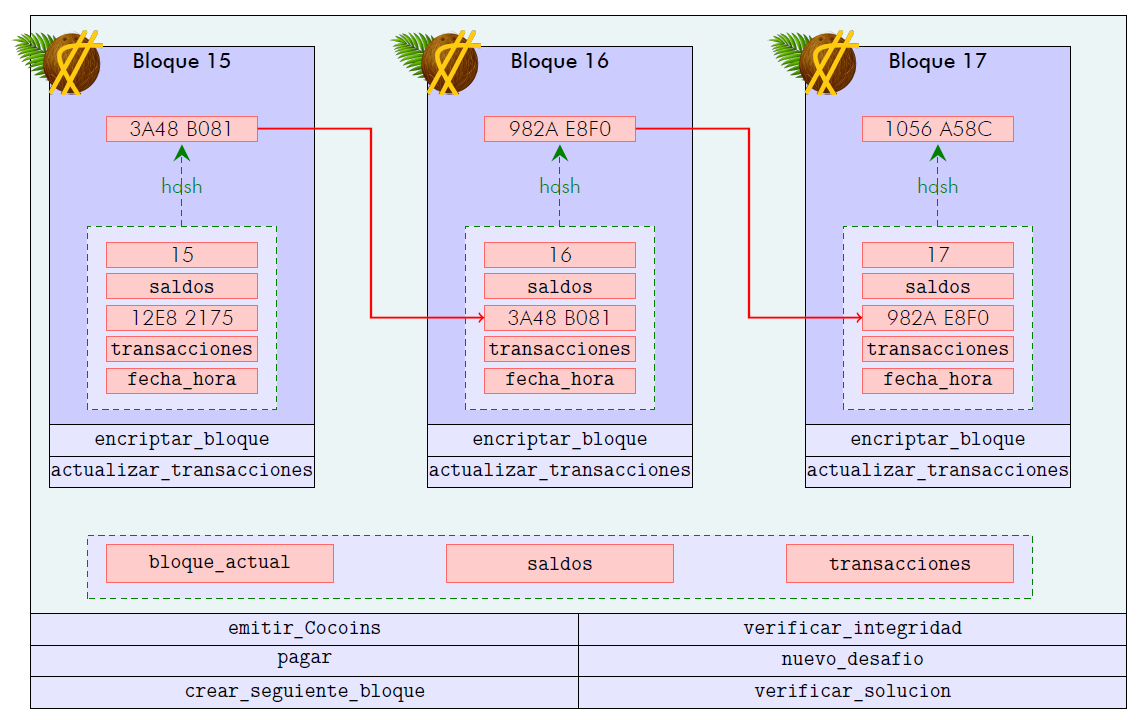

En la figura 3 ilustramos la clase `BlockChain`. De nuevo utilizamos el método `__init__`, esta vez para indicarle a Python cómo debe crear o “iniciar” una nueva cadena de bloques. En este caso lo que hacemos es crear un `Bloque` inicial, el llamado bloque “génesis”, utilizando para ello la plantilla que definimos en la sección anterior. Como describimos anteriormente, para crear un `Bloque` nuevo  se necesita de tres datos, a saber `índice, saldos, código_previo`. Por tratarse del primer bloque, le asignamos el índice 0 (siguiendo la convención en Python de que el primer elemento de una secuencia se indexa como “0” en vez de “1”), con un saldo original de 0 a favor del `'Banco Central'`, y ningún (`None`) código anterior por no haber un bloque antes del inicial. Este primer bloque lo añadimos (`.append`) al final de la cadena, que hasta ahora estaba vacía.

Aparte de los bloques mismos, la cadena de bloques contiene tres propiedades o datos:

* **`bloque_actual`** se refiere al último bloque en la cadena, en cual se indexa como `-1`. Este bloque es el único en el que se registrarán transacciones nuevas.
* **`saldos`** son los datos más actualizados de tenencias de Cocoins de cada usuario, que simplemente corresponden al campo `saldos` del  `bloque_actual`.
* **`transacciones`** son todas las transacciones registradas a lo largo de la cadena, y lo obtenemos concatenando (`pd.concat`) el campo `transacciones` de todos los bloques (`for bloque in self`) de la cadena, indexándolos además (`keys=`) por el número de bloque (`'Bloque{k}'`) en el cual están registrados.

Ahora bien, esta plantilla `Blockchain` define seis acciones que puede hacer la cadena:

* **`emitir_Cocoins`** para poder pagar con Cocoins alguien debe emitirlos con anterioridad. Pues bien, para simplificar nuestro trabajo asumiremos que hay un `'Banco Central'` que cumple esta función, a diferencia de lo que sucede con Bitcoin y otros criptoactivos en los cuales se “minan” las nuevas monedas. Indicamos que el único parámetro requerido es `cantidad`, la cual de ser válida se la sumamos al saldo del `'Banco Central'` y dejamos constancia de ello actualizando la tabla de transacciones, todo ello en el `bloque_actual` de la cadena. No obstante, la operación no será válida si pretende sacar de circulación (`cantidad` negativa) más Cocoins que los que existen en el `'Banco Central'`; de ser así, solo imprimimos una advertencia.
* **`pagar`** este método es la pieza más importante de nuestra plantilla, después de todo, la finalidad de `Blockchain` es constituirse en un sistema de pagos. De nuevo, para simplificar nuestra labor, no nos detendremos a considerar aspectos importantes de un sistema de pagos, como la verificación de credenciales de usuario y la manera en que los usuarios se comunican con la cadena de bloques. Especificamos que para tramitar un pago la cadena necesita saber quién (`cuenta_origen`) le paga cuántos Cocoins (`cantidad`) a quién (`cuenta_destino`). Habiendo recibido esa información, `Blockchain` crea un “atajo” para el bloque actual, llamándolo `cb` y verifica dos cosas: (i) que la cantidad no sea negativa , porque sería un cobro en vez de un pago, y (ii) que la `cuenta_origen` tenga fondos suficientes. De ser así, se verifica que `cuenta_destino` ya tenga una cuenta abierta (de lo contrario se abre una con saldo 0), y se procede a debitar `cantidad` del saldo de `cuenta_origen` y a acreditar esos fondos a `cuenta_destino`. Finalmente, se registra la transacción y se imprime un mensaje de confirmación.
* **`crear_siguiente_bloque`** El siguiente paso en la creación del `BlochChain` es especificar un mecanismo para crear un `Bloque` nuevo y enlazarlo en la cadena. Para ello, encriptamos el `bloque_actual`, y añadimos (`.append`) un `Bloque` nuevo: (i) su `índice` es igual al índice del bloque actual más 1 (`cb.índice+1`), (ii) tiene como `saldos` iniciales una copia de los saldos actuales (`cb.saldos.copy()`), y (iii) en `código_anterior` guarda el valor encriptado del bloque actual (`cb.código`).
* **`verificar_integridad`** una de las novedades del “blockchain” es que consiste en un mecanismo que permite a la vez fragmentar toda la información de la cadena en bloques individuales y detectar si alguno de los bloques ha sido adulterado. En este método verificamos si la cadena ha sido adulterada utilizando los código de encriptación que hemos generado y almacenado cada vez que se crean bloques nuevos por medio de `crear_siguiente_bloque`. El mecanismo es muy sencillo: iteramos la cadena hacia atrás, revisando que lo que un bloque señala como el `código_previo` sigue correspondiendo con la información encriptada del bloque anterior; si no es así, imprimimos una advertencia.

Dejamos para la sección 5 la descrición de los métodos **`nuevo_desafio`** y **`verificar_solucion`**, cuando discutamos una forma de “minar” cocoins.

# 4  Simulación del “blockchain”

Para ilustrar el funcionamiento de `BlockChain`, procedemos ahora a simular algunas transacciones. Empezamos creando el *blockchain* de `COCOIN`, emitiendo los primero 5000 Cocoins, y  revisando los saldos de la cadena:

In [10]:
COCOIN = BlockChain()
COCOIN.emitir_Cocoins(5000)
COCOIN.saldos

Banco Central    5000
dtype: int64

Como era de esperar, el único saldo hasta ahora corresponde a la emisión inicial de Cocoins. Ahora, imaginemos que el `'Banco Central'` le paga 600 Cocoins a cada uno de sus colaboradores `'Ana', 'Beto', 'Carlos', 'Diana'`

In [11]:
for nombre in ['Ana', 'Beto', 'Carlos', 'Diana']:
    COCOIN.pagar('Banco Central', nombre, 600)

Banco Central le pagó 600.00 Cocoins a Ana.
Banco Central le pagó 600.00 Cocoins a Beto.
Banco Central le pagó 600.00 Cocoins a Carlos.
Banco Central le pagó 600.00 Cocoins a Diana.


 y revisamos los saldos otra vez:

In [12]:
COCOIN.saldos

Banco Central    2600
Ana               600
Beto              600
Carlos            600
Diana             600
dtype: int64

así como el registro de transacciones

In [13]:
COCOIN.transacciones

Fecha                          De  \
Bloque0 0 2019-12-18 11:29:01.280624  Imprimiendo nuevos Cocoins   
        1 2019-12-18 11:29:01.474398               Banco Central   
        2 2019-12-18 11:29:01.479385               Banco Central   
        3 2019-12-18 11:29:01.482377               Banco Central   
        4 2019-12-18 11:29:01.486366               Banco Central   

                    Para Cantidad  
Bloque0 0  Banco Central     5000  
        1            Ana      600  
        2           Beto      600  
        3         Carlos      600  
        4          Diana      600

Hasta ahora todo bien. A continuación simulamos pagos aleatorios para crear 5 nuevos bloques, cada uno de los cuales tendrá un `NÚMERO_DE_PAGOS` aleatorio entre 2 y 11. Para cada uno de esos pagos, escogemos dos cuentas al azar, así como una cantidad aleatoria de entre 10 y 110 Cocoins. El pago lo procesamos en la última línea.

In [14]:
np.random.seed(2019)
NUMERO_DE_BLOQUES = 5

for i in range(0, NUMERO_DE_BLOQUES):
    COCOIN.crear_siguiente_bloque()
    print('\n', '='*60)
    print(f"El código del bloque {COCOIN[-2].índice} es:\n{COCOIN[-2].código}")
    print(f"El bloque #{COCOIN.bloque_actual.índice} ha sido agregado a la cadena del Cocoin!")
       
    NÚMERO_DE_PAGOS = np.random.randint(2,12)
    
    for k in range(NÚMERO_DE_PAGOS):
        DE, PARA = sample(list(COCOIN.saldos.index), 2)
        CANTIDAD = 10 * np.random.randint(1, 12)
        COCOIN.pagar(DE, PARA, CANTIDAD)


El código del bloque 0 es:
86D9 9C8C BAEC DA2D E629 F60C B0FD F3CA AA3B D46F 5786 A3C9 7D0D EF35 CAAF E8F9
El bloque #1 ha sido agregado a la cadena del Cocoin!
      Carlos le pagó  30.00 Cocoins a Banco Central.
Banco Central le pagó  60.00 Cocoins a Beto.
      Carlos le pagó  90.00 Cocoins a Banco Central.
        Beto le pagó  70.00 Cocoins a Ana.
        Beto le pagó  90.00 Cocoins a Ana.
      Carlos le pagó 110.00 Cocoins a Ana.
      Carlos le pagó  10.00 Cocoins a Banco Central.
        Beto le pagó  10.00 Cocoins a Diana.
         Ana le pagó  80.00 Cocoins a Diana.
        Beto le pagó  90.00 Cocoins a Diana.

El código del bloque 1 es:
2615 513A BD97 8E27 E4FC 9EE0 4302 6295 32BC 2878 A9FA 1A96 2978 9D91 3BB4 9F4C
El bloque #2 ha sido agregado a la cadena del Cocoin!
Banco Central le pagó  40.00 Cocoins a Beto.
         Ana le pagó  10.00 Cocoins a Banco Central.
      Carlos le pagó  30.00 Cocoins a Banco Central.
       Diana le pagó  60.00 Cocoins a Ana.
Banco Central 

Note que a pesar de que los pagos son aleatorios, hemos fijado una semilla  en la primera línea de esa celda para obtener los mismos resultados cada vez (para poder reproducir los resultados, aunque los códigos *hash* serán distintos porque cambia la fecha y hora de ejecución del código).


Revisamos de nuevo los saldos y vemos que de los cuatro participantes:

In [15]:
COCOIN.saldos

Banco Central    2710
Ana               780
Beto              550
Carlos            120
Diana             840
dtype: int64

Ahora imprimimos la tabla completa de transacciones, y comprobamos que su detalle es consistente con la bitácora que quedó impresa más arriba:

In [16]:
COCOIN.transacciones

Fecha                          De  \
Bloque0 0 2019-12-18 11:29:01.280624  Imprimiendo nuevos Cocoins   
        1 2019-12-18 11:29:01.474398               Banco Central   
        2 2019-12-18 11:29:01.479385               Banco Central   
        3 2019-12-18 11:29:01.482377               Banco Central   
        4 2019-12-18 11:29:01.486366               Banco Central   
Bloque1 0 2019-12-18 11:29:01.836524                      Carlos   
        1 2019-12-18 11:29:01.840514               Banco Central   
        2 2019-12-18 11:29:01.845502                      Carlos   
        3 2019-12-18 11:29:01.849490                        Beto   
        4 2019-12-18 11:29:01.854477                        Beto   
        5 2019-12-18 11:29:01.858465                      Carlos   
        6 2019-12-18 11:29:01.863452                      Carlos   
        7 2019-12-18 11:29:01.868438                        Beto   
        8 2019-12-18 11:29:01.873425                         Ana   
        9 2019-12-18 11:29:01.878412                        Beto   
Bloque2 0 2019-12-18 11:29:01.892407               Banco Central   
        1 2019-12-18 11:29:01.896364                         Ana   
        2 2019-12-18 11:29:01.898358                      Carlos   
        3 2019-12-18 11:29:01.901349                       Diana   
        4 2019-12-18 11:29:01.904342               Banco Central   
        5 2019-12-18 11:29:01.906336                         Ana   
        6 2019-12-18 11:29:01.909332                        Beto   
Bloque3 0 2019-12-18 11:29:01.924289                        Beto   
        1 2019-12-18 11:29:01.928278                       Diana   
        2 2019-12-18 11:29:01.932268                       Diana   
        3 2019-12-18 11:29:01.936257                      Carlos   
        4 2019-12-18 11:29:01.941243                       Diana   
        5 2019-12-18 11:29:01.943239                       Diana   
Bloque4 0 2019-12-18 11:29:01.955207                      Carlos   
        1 2019-12-18 11:29:01.958200               Banco Central   
        2 2019-12-18 11:29:01.961190               Banco Central   
        3 2019-12-18 11:29:01.963184                      Carlos   
        4 2019-12-18 11:29:01.966176                      Carlos   
        5 2019-12-18 11:29:01.970166                       Diana   
        6 2019-12-18 11:29:01.975152                         Ana   
        7 2019-12-18 11:29:01.978144                       Diana   
Bloque5 0 2019-12-18 11:29:01.990145                         Ana   
        1 2019-12-18 11:29:01.994138               Banco Central   
        2 2019-12-18 11:29:01.997094                      Carlos   

                    Para Cantidad  
Bloque0 0  Banco Central     5000  
        1            Ana      600  
        2           Beto      600  
        3         Carlos      600  
        4          Diana      600  
Bloque1 0  Banco Central       30  
        1           Beto       60  
        2  Banco Central       90  
        3            Ana       70  
        4            Ana       90  
        5            Ana      110  
        6  Banco Central       10  
        7          Diana       10  
        8          Diana       80  
        9          Diana       90  
Bloque2 0           Beto       40  
        1  Banco Central       10  
        2  Banco Central       30  
        3            Ana       60  
        4          Diana       80  
        5           Beto       90  
        6  Banco Central       60  
Bloque3 0         Carlos       10  
        1           Beto       20  
        2         Carlos       70  
        3  Banco Central      110  
        4  Banco Central       10  
        5  Banco Central       30  
Bloque4 0          Diana       70  
        1           Beto       40  
        2         Carlos       20  
        3            Ana       40  
        4          Diana       60  
        5  Banco Central       10  
        6           Beto       30  
        7  Ban

Finalmente, verificamos la integridad de la cadena de bloques y comprobamos que la cadena está bien, porque todos los bloques siguen enlazados correctamente: la información encriptada de cada bloque corresponde con la clave previa guardada por el siguiente bloque.

In [17]:
COCOIN.verificar_integridad()


Verificando bloque4
5485 DCCB ADC4 4020 E6C4 B3A5 79FC FCAB 6168 505C 8F94 1DBE AEF4 6D07 7456 5956
5485 DCCB ADC4 4020 E6C4 B3A5 79FC FCAB 6168 505C 8F94 1DBE AEF4 6D07 7456 5956

Verificando bloque3
D515 F9C5 70D0 867F 8323 B1D5 5D2B 6AB1 A1F4 AF23 8956 7B6C 681C C90C B7D6 2A15
D515 F9C5 70D0 867F 8323 B1D5 5D2B 6AB1 A1F4 AF23 8956 7B6C 681C C90C B7D6 2A15

Verificando bloque2
D8B5 175B D619 F579 F9F1 34CD DB71 2780 728D 1900 3F9D 30CD 5375 D7DF 155A 42E2
D8B5 175B D619 F579 F9F1 34CD DB71 2780 728D 1900 3F9D 30CD 5375 D7DF 155A 42E2

Verificando bloque1
2615 513A BD97 8E27 E4FC 9EE0 4302 6295 32BC 2878 A9FA 1A96 2978 9D91 3BB4 9F4C
2615 513A BD97 8E27 E4FC 9EE0 4302 6295 32BC 2878 A9FA 1A96 2978 9D91 3BB4 9F4C

Verificando bloque0
86D9 9C8C BAEC DA2D E629 F60C B0FD F3CA AA3B D46F 5786 A3C9 7D0D EF35 CAAF E8F9
86D9 9C8C BAEC DA2D E629 F60C B0FD F3CA AA3B D46F 5786 A3C9 7D0D EF35 CAAF E8F9
LA CADENA DE BLOQUES ESTÁ BIEN!


Como último ejercicio, supongamos ahora que un *hacker* logra infiltrarse en la cadena y modifica un dato, poniendo un saldo de 900 Cocoins a su favor:

In [18]:
COCOIN[3].saldos['LADRON'] = 900
COCOIN[3].saldos

Banco Central    2800
Ana               750
Beto              480
Carlos            300
Diana             670
LADRON            900
dtype: int64

Cuando verificamos la integridad de la cadena, detectamos que ha sido adulterada porque esa modificación que introdujo `'LADRON'` ocasiona que el código *hash* del bloque 3 ya no coincida con lo que el bloque 4 esperaba encontrar.

In [19]:
COCOIN.verificar_integridad()


Verificando bloque4
5485 DCCB ADC4 4020 E6C4 B3A5 79FC FCAB 6168 505C 8F94 1DBE AEF4 6D07 7456 5956
5485 DCCB ADC4 4020 E6C4 B3A5 79FC FCAB 6168 505C 8F94 1DBE AEF4 6D07 7456 5956

Verificando bloque3
D515 F9C5 70D0 867F 8323 B1D5 5D2B 6AB1 A1F4 AF23 8956 7B6C 681C C90C B7D6 2A15
A3FC 5F7C 2F01 79F2 CAF9 CD15 F005 5667 719E 3190 7280 F74B 0A94 9192 431B 6FBE
ADVERTENCIA: LA CADENA DE BLOQUES FUE ADULTERADA EN EL BLOQUE 3!!!


# 5  Minando cocoins

Tal como está programado, la cadena de bloques del Cocoin emite nuevos cocoins de una manera muy sencilla: el `'Banco Central'` los emite y los pone en circulación “pagándole” a `'Ana', 'Beto', 'Carlos', 'Diana'` 600 cocoins a cada uno. Está claro que en esta situación el `'Banco Central'` recibe todo el señoreaje.

Supongamos ahora que el `'Banco Central'` decide “democratizar” el señoreaje e implementa un sistema “PoW” (*proof-of-work* o prueba de trabajo), que consiste en acreditarle 20 cocoins al primero de sus cuatro colaboradores que resuelva un problema. Un problema PoW es en esencia un problema que resulta relativamente lento de resolver pero sumamente fácil de verificar que ha sido resuelto. Un ejemplo sencillo es un rompecabezas de 500 piezas: aunque lleva cierto tiempo armarlo, es muy fácil saber si ya ha sido armado.

La prueba de trabajo o *PoW* para Cocoin la implementamos en los siguientes dos métodos:

* **`nuevo_desafio`** En nuestro caso concreto, el `'Banco Central'` escogerá de manera aleatoria un número entre 0 y $10^p-1$, lo encriptará usando la función `encriptar`, y anunciará el código encriptado y el valor de $p$, donde $p$ es un entero que controla el nivel de dificultad del problema.
* **`verificar_solucion`** al primero de los colaboradores que “adivine” el número aleatorio que dio origen al código anunciado, el `'Banco Central'`  le acreditará 20 cocoins. Una vez hecho esto, se creará un nuevo bloque en la cadena de Cocoin y se creará un nuevo problema.

Simulemos ahora un primer desafío:

In [20]:
p = 4
COCOIN.nuevo_desafio(p)


Nuevo desafío (dificultad = 4): 73AB FDAD 3AAB EE92 D53C 8788 AD61 1FB1 030C EAC3 EA90 AFCD 775B F650 577D 6358


Por las razones que discutimos en la sección 1, `'Ana', 'Beto', 'Carlos', 'Diana'` saben que es prácticamente imposible “invertir” un código \textit{hash}. No obstante, dado que ellos conocen las reglas del juego, saben que ese código corresponde a un número entre 0 y 9999. Así, la alternativa que tienen es encriptar secuencialmente todos esos números y comparando los resultados con el código publicado. Como además ellos saben de Python, en vez de ir encriptando uno a uno los números, escriben una función que hace todo el trabajo:

In [21]:
def adivinar(p, nombre):
    for numero in range(10**p):
        codigo = encriptar(str(numero))
        if codigo == COCOIN.desafio:
            print(f'{nombre} adivinó {numero}')
            COCOIN.verificar_solucion(numero, nombre)
            break

Esta función itera sobre todos los posibles números, los encripta y los compara con el código *hash*. Una vez que resuelve el problema, le comunica a la cadena de COCOIN el resultado y el nombre del minero para que se le acrediten los fondos respectivos.

Cuando `'Ana'` empieza a minar, logra encontrar el número que el `'Banco Central'` había escogido, y consigue así 20 cocoins de recompensa.

In [22]:
adivinar(p, 'Ana')

Ana adivinó 2098
Banco Central le pagó  20.00 Cocoins a Ana.

Nuevo desafío (dificultad = 4): 9905 B916 1212 4512 0315 774B 8373 4678 48C1 F241 7259 B26F 910D 5EB0 3940 7668


Como es de esperar, `'Beto', 'Carlos', 'Diana'` también están interesados en ganar estos cocoins con solo tener sus propias computadoras ejecutando la función `adivinar`. Esta vez es `'Beto'` quien obtiene los siguiente 20 cocoins:

In [23]:
adivinar(p, 'Beto')

Beto adivinó 7608
Banco Central le pagó  20.00 Cocoins a Beto.

Nuevo desafío (dificultad = 4): 0998 EA34 1184 FD75 1F0F E48D E9E2 9A97 6269 9361 0264 7EDD D337 E32D C784 104C


Conforme aumente el valor de los cocoins, el número de interesados en minarlos irá aumentando. Dado que solo el primer minero en resolver el problema actual recibirá cocoins, esto crea un fuerte incentivo para competir por medio de aumentar la capacidad computacional. Con tantos mineros y recursos computacionales dedicados a esta actividad, la velocidad con la cual se resuelven los problemas aumenta y la cadena eventualmente responde aumentando el valor de $p$, para que sea cada vez más difícil resolverlos (de lo contrario se crean bloques nuevos demasiado pronto). El resultado final de todo esto es la típica situación conocida en teoría de juegos como el *dilema del prisionero*. En esta situación hay dos equilibrios: el primero de ellos es un equilibrio **inestable**, donde todos los mineros dedican un mínimo de recursos computacionales a resolver los problemas, y el segundo es un equilibrio **estable** en el cual todos los mineros dedican muchísimos recursos. El  dilema se presenta por cuanto, aunque en ambos equilibrios el premio (la cantidad de cocoins minados) es el mismo, el **costo** de minarlos en el segundo equilibrio es considerablemente mayor al del primero. A pesar de ser **socialmente** deseable el primer equilibrio, ¿por qué es inestable?: porque en tal situación para cada minero es **individualmente** deseable dedicar más recursos a la minería, para aumentar sus propios ingresos esperados. Como todos los mineros saben esto, todos terminan dedicando más recursos a la actividad.

Si al leer esto piensa que esta manera de “democratizar” el señoreaje a través de la minería no es más que un gran desperdicio de energía, ¡estamos de acuerdo! De hecho, el consumo energético de la red de Bitcoin es tan alto que alcanzaría para dotar permanente de electricidad a más de un país entero**5**.

# 6 Reflexiones finales

Para la inmensa mayoría de quienes no somos expertos en tecnología o informática, algunas de las nuevas tecnologías se nos presentan con cierto aire de misterio. En muchos de estos casos no necesitamos saber **cómo** funciona algo para sacarle provecho: por ejemplo, no necesitamos saber cómo funciona un motor de combustión interna para poder conducir un automóvil. Pero para que podamos juzgar si un sistema de pagos basado en una innovación informática es seguro y confiable, sí resulta necesario entender más a fondo tal innovación. Por ello, el objetivo de este documento de trabajo ha sido el de explicar de la forma más sencilla posible **cómo** funciona el *blockchain*, la innovación detrás de muchos de los criptoactivos de moda.

Para hacerlo sencillo, nos hemos abstenido de hacer una descripción precisa de cómo funciona un *blockchain* de Bitcoin, y más bien hemos rescatado sus elementos más esenciales. Tampoco hemos discutido sobre cómo adquirir ni hacer transacciones con Bitcoin**6**, ni tampoco de los riesgos asociados con ello.

Habiendo explicado cómo funciona un *blockchain*, pasamos ahora a dos reflexiones sobre el fondo del asunto: (1) ¿puede un sistema de pagos prescindir de la *confianza*?, y (2) ¿es realmente el *blockchain* una tecnología valiosa?

## ¿En quién confiamos?

Según su creador, Bitcoin fue pensado como un sistema de pagos completamente descentralizado, para sustituir lo que consideraba un sistema ineficiente

> La raíz del problema con el dinero convencional es toda la confianza que se requiere para hacerlo funcionar. Debe confiarse en que el banco central no degrade el dinero, pero la historia del dinero fiduciario está lleno de incumplimientos a esta confianza. Debe confiarse en que los bancos guarden nuestro dinero y que lo transfieran de manera electrónica, pero los bancos lo prestan en olas de burbujas de crédito con apenas una fracción en reserva.

-- Nakamoto (2009), traducción libre.

Lo que parece ignorar Nakamoto es que **todo** sistema de pagos necesita de que sus usuarios **confíen** en su correcto funcionamiento. Por ello, su afirmación de que su Bitcoin es un sistema de pagos “completamente descentralizado, sin un servidor central o partes en las que haya que confiar, *porque todo se basa en prueba criptográfica en vez de confianza*” (Nakamoto 2009, traducción libre, resaltado no en el original) resulta de lo más ingenua o cínica. ¿Por qué? Porque en realidad lo único que hace bitcoin es obligar a sus usuarios a trasladar la confianza depositada en las instituciones financieras tradicionales a la red de pagos de Bitcoin. Para explicar mejor este punto, consideremos los siguientes casos ilustrativos:

1. al ser Bitcoin un sistema basado en *tokens* o fichas, las cuales debo poseer para demostrar que son mías (como sucede con el dinero en efectivo), al resguarlas debo confiar en:
  - el dispositivo de almacenamiento de mi computador (disco duro o sólido); si falla se pierden los bitcoins,
  - en la seguridad de red de mi computador (en caso de que un *hacker* intente robarse los bitcoins)
  - en mi propia memoria, para recordar las claves  y  además, si para evitar un ataque de un *hacker*, almaceno los bitcoins en una memoria USB, de no olvidar dónde puse ese dispositivo (de la misma manera que debo recordar donde puse mi billetera o cartera)
2. si utilizo un monedero en Internet para evitar los riesgos del punto 1, entonces debo confiar en el dueño de tal sitio web, del que posiblemente ni siquiera sé dónde está domiciliado. En este caso debo confiar tanto de su honorabilidad como de su competencia (no son infrecuentes las noticias de ciberataques a este tipo de sitios). Nótese que esto es similar a la confianza que requiero cuando deposito mi efectivo en un banco.
3. si deseo gastar mis bitcoins, debo confiar en los proveedores de conexión al *blockchain* de Bitcoin (sin esta conexión resulta literalmente imposible pagar con bitcoins). La inmensa mayoría del público carece de las competencias informáticas necesarias para conectarse directamente a Bitcoin, por lo que al final terminan confiando en proveedores de aplicaciones (para teléfonos celulares, por ejemplo)
4. según lo prometido por Nakamoto, el Bitcoin es una red “completamente descentralizada”, lo cual resultaría atractivo en tanto esto haría que el valor de Bitcoin no dependiese de las decisiones arbitrarias de un pequeño grupo de personas. Pero la descentralización de la red no implica la descentralización de los saldos de bitcoins, por lo que algunos pocos participantes en este mercado pueden manipular fácilmente su precio (Kharif 2017, Orcutt 2018).
5. si me interesa el Bitcoin como resguardo de valor, entonces debo confiar en que su precio será estable en el tiempo. En esto es donde peores resultados ha dado la criptomoneda, dado su enorme volatilidad, ante la cual las pérdidas de valor de la moneda fiduciaria mencionadas por Nakamoto apenas parecen visibles.

En este último punto en específico es importante señalar que luego de la crisis financiera internacional de 2008 el dinero fiduciario de las principales economías del mundo no perdieron mucho valor (las tasas de inflación han permanecido realmente bajas en la última década). Lo que sí ocurrió fue un aumento en la variabilidad de los tipos de cambio,  pero hay que recordar que un tipo de cambio es el precio **relativo** de una moneda en términos de otra, por lo que si una baja su valor entonces necesariamente la otra lo sube.

## ¿Sirve para algo el blockchain?

Como lo indicamos al inicio de este documento, la utilidad del Bitcoin (y de otros criptoactivos similares) como instrumento monetario ha sido muy cuestionado, por ejemplo en  Alfaro Ureña y Muñoz Salas (2019) y en Romero Aguilar y Jiménez Elizondo (2019). 

Aún así, hay quienes piensan que más allá de las limitaciones de Bitcoin, el *blockchain* ha venido a revolucionar la economía (los más entusiastas) o que al menos merece estudiarse sus potenciales aplicaciones. Un ejemplo de esto último es el *Proyecto Stella*, desarrollado conjuntamente por el Banco Central Europeo y el Banco de Japón, que explora la posibilidad de utilizar los registros distribuidos (*distributed ledger*) en las infraestructuras de mercados financieros, para la liquidación de pagos de alto valor (etapa 1), la liquidación simultánea de obligaciones vinculadas (como el pago de efectivo contra la entrega de un título valor, en la etapa 2), y operaciones cambiarias en pagos transfronterizos (etapa 3).

Pero no todos están tan ilusionados con *blockchain*. En un artículo de opinión *Blockchain's Broken Promises* Nouriel Roubini (2018a), uno de los más acérrimos críticos del *blockchain*, señaló que el *blockchain* aún enfrenta grandes desafíos, entre ellos la ausencia de protocolos comunes y universales que hicieron posible a Internet (TCP-IP, HTML, por ejemplo). Señala además que su promesa de transacciones descentralizadas sin una autoridad intermediaria no es más que una quimera utópica, punto que retoma en Roubini (2018b) al señalar que *blockchain* no es más que una hoja de cálculo sobrevalorada, ya que ninguna institución (banco, corporación, agencia gubernamental o no gubernamental) pondría sus registros (sean estos contables, de transacciones, clientes, o proveedores) en un registro público de acceso irrestricto: simplemente no hay motivo alguno por el cual información altamente valiosa deba registrarse públicamente.

----------------
### Notas

<ol>
  <li>Este código fue inspirado por un ejemplo presentado por Nash (2017).</li>
  <li>Hay muchos recursos en Internet para aprender Python; un libro excelente para empezar a aprender lo básico es McGrath (2016).</li>
  <li> Este documento de trabajo fue publicado originalmente en formato PDF en el sitio de Internet de la <a href="http://www.secmca.org/etiqueta_documento/investigaciones_otros_documentos/">SECMCA</li>
  <li>Quienes estén interesados en más detalles acerca del funcionamiento de blockchain, pueden consultar  Nash (2017a).</li>
    <li>En la nota Romero y Jimenez (2019) ampliamos detalles sobre este tema.</li>
    <li>Para ampliar sobre este punto una referencia es el libro de  Prypto (2016).</li>
</ol>

---
### Referencias

* Alfaro Ureña, Alonso y Evelyn Muñoz Salas (editores) (2019). Criptoactivos: análisis e implicaciones desde la perspectiva del Banco Central de Costa Rica. Nota Técnica 001. Banco Central de Costa Rica.
* Kharif, Olga (8 de dic. de 2017). The Bitcoin Whales: 1,000 People Who Own 40 Percent of the Market. URL: https://www.bloomberg.com/news/articles/2017-12-08/thebitcoin-whales-1-000-people-who-own-40-percent-of-the-market.
* McGrath, Mike (2016). Python in Easy Steps. In Easy Steps Limited.
* Nakamoto, Satoshi (2008). Bitcoin: A Peer-to-Peer Electronic Cash System. URL: https://bitcoin.org/bitcoin.pdf.
* –-(11 de feb. de 2009). Bitcoin open source implementation of P2P currency. URL: http://p2pfoundation.ning.com/forum/topics/bitcoin-open-source.
* Nash, Gerald (16 de jul. de 2017a). Let’s Build the Tiniest Blochchain. In Less Than 50 Lines of Python. URL: https://medium.com/crypto-currently/lets-build-thetiniest-blockchain-e70965a248b.
* -– (23 de jul. de 2017b). Let’s Make the Tiniest Blochchain Bigger. Part 2: With More Lines of Python. URL: https://medium.com/crypto-currently/lets-make-the-tiniestblockchain-bigger-ac360a328f4d.
* Orcutt, Mike (18 de ene. de 2018). Bitcoin and Ethereum have a hidden power structure, and it’s just been revealed. URL: https://www.technologyreview.com/s/610018/bitcoin-and-ethereum-have-a-hidden-power-structure-and-its-just-beenrevealed/.
* Prypto (2016). Bitcoin for Dummies. John Wiley & Sons. ISBN: 978-1-119-07613-1.
* Romero Aguilar, Randall y Keylin Jiménez Elizondo (nov. de 2019). Vulnerabilidades del Bitcoin. Notas Económicas Regionales 107. Secretaría Ejecutiva del Consejo Monetario Centroamericano.
* Roubini, Nouriel (26 de ene. de 2018a). Blockchain’s Broken Promises. Project Syndicate. URL: https://www.project-syndicate.org/commentary/why-bitcoin-is-a-bubble-by-nouriel-roubini-2018-01.
* –- (15 de oct. de 2018b). The Big Blockchain Lie. Project Syndicate. URL: https://www.project-syndicate.org/commentary/blockchain-big-lie-by-nouriel-roubini-2018-10.